# Data formatting for STGAN
# `dataset1`
## Setup

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch

## Cameras

In [2]:
cams = pd.read_csv("traffic_data/dataset1/CamerasGPSinfo.csv")
cams

,CamId,Longitude,Latitude,Bearing
0,1,11.986280,57.697137,155
1,2,11.985522,57.696668,85
2,4,11.965964,57.706792,90
3,5,11.977686,57.708775,175
4,6,11.972374,57.707239,60
...,...,...,...,...
129,115,11.968668,57.701172,240
130,116,11.968668,57.701172,60
131,117,11.967943,57.700256,250
132,118,11.967943,57.700256,70


### Locations

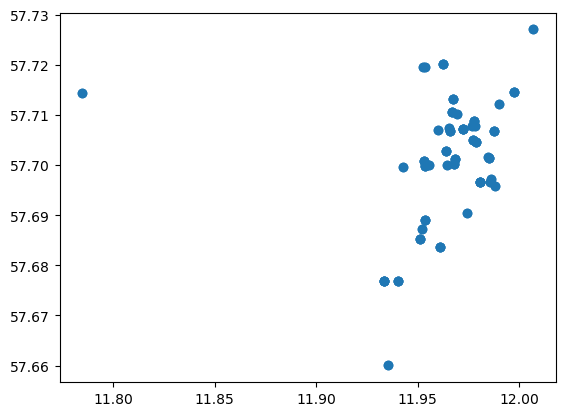

In [3]:
plt.scatter(cams.Longitude, cams.Latitude)

### Camera IDs

We verified that all the data are from the same group of cameras.

## Data

In [4]:
raw = pd.read_pickle("traffic_data/dataset1/dens_0201")
raw.columns = raw.columns.map(lambda x: "Cam" + x[x.find("Cam") + 3:])
day_number = 0 # The first file from the files dens_*

In [5]:
raw

,Cam2,Cam4,Cam5,Cam7,Cam10,Cam14,Cam15,Cam16,Cam17,Cam20,...,Cam99,Cam103,Cam104,Cam105,Cam111,Cam112,Cam113,Cam114,Cam115,Cam116
0,"[0454, 0.1]","[0454, 0.0]","[0454, 0.0]","[0454, 0.0]","[0454, 0.05]","[0454, 0.02]","[0454, 0.0]","[0454, 0.0]","[0454, 0.06]","[0454, 0.01]",...,"[0454, 0.01]","[0454, 0.0]","[0454, 0.0]","[0454, 0.05]","[0454, 0.0]","[0454, 0.03]","[0454, 0.0]","[0454, 0.0]","[0454, 0.01]","[0454, 0.04]"
1,"[0455, 0.09]","[0455, 0.0]","[0455, 0.0]","[0455, 0.0]","[0455, 0.05]","[0455, 0.02]","[0455, 0.0]","[0455, 0.0]","[0455, 0.06]","[0455, 0.01]",...,"[0455, 0.01]","[0455, 0.0]","[0455, 0.0]","[0455, 0.06]","[0455, 0.0]","[0455, 0.03]","[0455, 0.01]","[0455, 0.0]","[0455, 0.01]","[0455, 0.04]"
2,"[0456, 0.09]","[0456, 0.0]","[0456, 0.0]","[0456, 0.0]","[0456, 0.04]","[0456, 0.02]","[0456, 0.0]","[0456, 0.0]","[0456, 0.06]","[0456, 0.01]",...,"[0456, 0.01]","[0456, 0.0]","[0456, 0.0]","[0456, 0.05]","[0456, 0.01]","[0456, 0.03]","[0456, 0.0]","[0456, 0.0]","[0456, 0.01]","[0456, 0.04]"
3,"[0457, 0.1]","[0457, 0.0]","[0457, 0.0]","[0457, 0.0]","[0457, 0.06]","[0457, 0.02]","[0457, 0.0]","[0457, 0.0]","[0457, 0.06]","[0457, 0.01]",...,"[0457, 0.01]","[0457, 0.0]","[0457, 0.0]","[0457, 0.05]","[0457, 0.01]","[0457, 0.03]","[0457, 0.0]","[0457, 0.0]","[0457, 0.01]","[0457, 0.04]"
4,"[0458, 0.09]","[0458, 0.0]","[0458, 0.0]","[0458, 0.0]","[0458, 0.06]","[0458, 0.02]","[0458, 0.0]","[0458, 0.0]","[0458, 0.06]","[0458, 0.01]",...,"[0458, 0.01]","[0458, 0.0]","[0458, 0.0]","[0458, 0.05]","[0458, 0.0]","[0458, 0.03]","[0458, 0.0]","[0458, 0.0]","[0458, 0.01]","[0458, 0.04]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
949,"[2057, 0.11]","[2056, 0.0]","[2056, 0.04]","[2056, 0.0]","[2056, 0.06]","[2055, 0.02]","[2054, 0.0]","[2053, 0.0]","[2053, 0.02]","[2053, 0.09]",...,"[2058, 0.02]","[2056, 0.01]","[2056, 0.02]","[2057, 0.13]","[2055, 0.0]","[2055, 0.02]","[2055, 0.0]","[2055, 0.0]","[2055, 0.01]","[2055, 0.01]"
950,"[2058, 0.11]","[2057, 0.0]","[2057, 0.04]","[2057, 0.0]","[2057, 0.06]","[2056, 0.02]","[2055, 0.0]","[2054, 0.0]","[2054, 0.02]","[2054, 0.07]",...,"[2059, 0.0]","[2057, 0.01]","[2057, 0.02]","[2058, 0.11]","[2056, 0.09]","[2056, 0.02]","[2056, 0.0]","[2056, 0.0]","[2056, 0.01]","[2056, 0.01]"
951,"[2059, 0.0]","[2058, 0.0]","[2058, 0.03]","[2058, 0.0]","[2058, 0.05]","[2057, 0.03]","[2056, 0.0]","[2055, 0.0]","[2055, 0.02]","[2055, 0.1]",...,"[2100, 0.0]","[2058, 0.13]","[2058, 0.04]","[2059, 0.15]","[2057, 0.06]","[2057, 0.02]","[2057, 0.0]","[2057, 0.0]","[2057, 0.01]","[2057, 0.01]"
952,"[2100, 0.1]","[2059, 0.0]","[2059, 0.03]","[2059, 0.01]","[2059, 0.04]","[2058, 0.02]","[2057, 0.0]","[2056, 0.0]","[2056, 0.03]","[2056, 0.09]",...,NaN,"[2059, 0.01]","[2059, 0.02]","[2100, 0.13]","[2058, 0.02]","[2058, 0.0]","[2058, 0.0]","[2058, 0.0]","[2058, 0.01]","[2058, 0.0]"


We will be using data for training from the first 12 days. Hence, we will have total of $12 \text{ days} \times 24 \text{ hours} \times 60 \text{ minutes} = 17280 \text{ minutes}$. However, we are missing some hours during the night, so we will set those to 0.

Per day we will have $24 \text{ hours} \times 60 \text{ minutes} = 1440 \text{ minutes}$.

In [6]:
cameras_used = raw.columns

### Merge all data

In [7]:
number_of_days = 18
data = pd.DataFrame([])
data["Timestamp"] = range(1440 * number_of_days)
data[raw.columns] = 0
data

,Timestamp,Cam2,Cam4,Cam5,Cam7,Cam10,Cam14,Cam15,Cam16,Cam17,...,Cam99,Cam103,Cam104,Cam105,Cam111,Cam112,Cam113,Cam114,Cam115,Cam116
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25915,25915,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25916,25916,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25917,25917,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25918,25918,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
dates_list = ["0201", "0208", "0215", "0222", "0301", "0308", "0315", "0322", "0329", "0405", "0412", "0419", "0426", "0503", "0510", "0517", "0524", "0531"]

In [9]:
day_number = 0
for date in dates_list:
    raw = pd.read_pickle("traffic_data/dataset1/dens_" + date)
    raw.columns = raw.columns.map(lambda x: "Cam" + x[x.find("Cam") + 3:])  
    
    for camera in raw.columns:
        camera_data = raw[camera].dropna()
        camera_data.index = camera_data.apply(lambda x: x[1]).index.map(lambda x: x + day_number*1440)
        data.loc[camera_data.apply(lambda x: day_number*1440 + int(x[0][0:2])*60 + int(x[0][2:4])), camera] = camera_data.apply(lambda x: x[1])
        # print(data.loc[camera_data.apply(lambda x: day_number*1440 + int(x[0][0:2])*60 + int(x[0][2:4])), camera])

    day_number += 1

data = data[data>=0]
data.fillna(0, inplace=True)

In [10]:
data

,Timestamp,Cam2,Cam4,Cam5,Cam7,Cam10,Cam14,Cam15,Cam16,Cam17,...,Cam99,Cam103,Cam104,Cam105,Cam111,Cam112,Cam113,Cam114,Cam115,Cam116
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25915,25915,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25916,25916,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25917,25917,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25918,25918,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
smooth_int = 5
smooth_len = int(data.shape[0]/smooth_int)
smooth_len

5184

In [12]:
data_smooth = pd.DataFrame([], columns=data.columns, dtype=float)
data_smooth["Timestamp"] = range(smooth_len)
data_smooth

,Timestamp,Cam2,Cam4,Cam5,Cam7,Cam10,Cam14,Cam15,Cam16,Cam17,...,Cam99,Cam103,Cam104,Cam105,Cam111,Cam112,Cam113,Cam114,Cam115,Cam116
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5179,5179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5180,5180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5181,5181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5182,5182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
data.drop(["Timestamp"], axis=1, inplace=True)

In [14]:
for col in data.columns:
    for i in range(smooth_len):
        data_smooth.loc[i, col] = data.loc[i*smooth_int:(i+1)*smooth_int, col].mean()

In [15]:
data_smooth

,Timestamp,Cam2,Cam4,Cam5,Cam7,Cam10,Cam14,Cam15,Cam16,Cam17,...,Cam99,Cam103,Cam104,Cam105,Cam111,Cam112,Cam113,Cam114,Cam115,Cam116
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5179,5179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5180,5180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5181,5181,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5182,5182,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<Axes: >

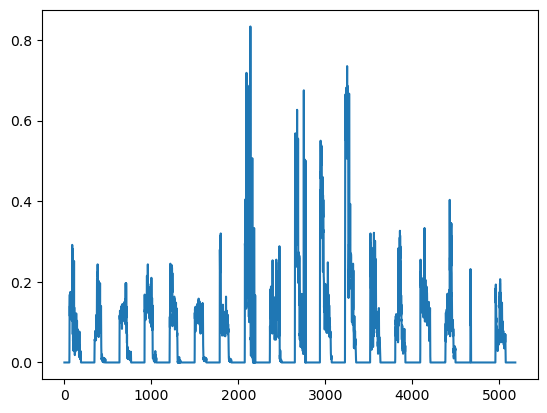

In [16]:
data_smooth.Cam116.plot()

<Axes: >

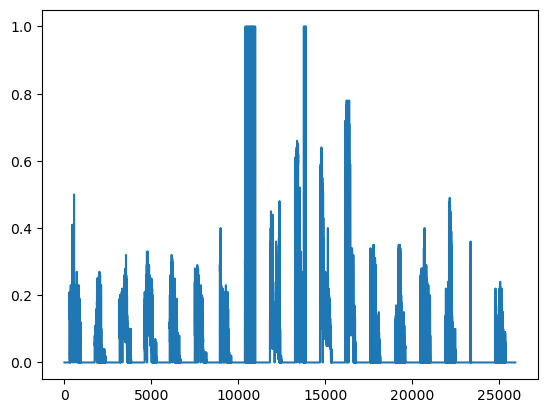

In [17]:
data.Cam116.plot()

In [18]:
data_smooth['Cam2']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
5179    0.0
5180    0.0
5181    0.0
5182    0.0
5183    0.0
Name: Cam2, Length: 5184, dtype: float64

In [19]:
os.makedirs("stgan-algo/STGAN/ximantis_smooth/data", exist_ok=True)

In [20]:
data_smooth.drop(["Timestamp"], axis=1, inplace=True)

In [21]:
# Save
np.save("stgan-algo/STGAN/ximantis_smooth/data/data.npy", data_smooth)

In [22]:
data_tensor = torch.tensor(np.load("stgan-algo/STGAN/ximantis_smooth/data/data.npy"), dtype=torch.float)
data_tensor.shape

torch.Size([5184, 42])

In [23]:
data_tensor = data_tensor.reshape([data_tensor.shape[0], data_tensor.shape[1], 1, 1])
data_tensor.shape

torch.Size([5184, 42, 1, 1])

In [24]:
# Save
# np.save("stgan-algo/STGAN/ximantis_smooth/data/data.npy", data_tensor.repeat([1,1,1,2]).numpy())
np.save("stgan-algo/STGAN/ximantis_smooth/data/data.npy", data_tensor.numpy())

## Node distances

In [25]:
cams

,CamId,Longitude,Latitude,Bearing
0,1,11.986280,57.697137,155
1,2,11.985522,57.696668,85
2,4,11.965964,57.706792,90
3,5,11.977686,57.708775,175
4,6,11.972374,57.707239,60
...,...,...,...,...
129,115,11.968668,57.701172,240
130,116,11.968668,57.701172,60
131,117,11.967943,57.700256,250
132,118,11.967943,57.700256,70


In [26]:
cameras_used

Index(['Cam2', 'Cam4', 'Cam5', 'Cam7', 'Cam10', 'Cam14', 'Cam15', 'Cam16',
       'Cam17', 'Cam20', 'Cam23', 'Cam24', 'Cam25', 'Cam27', 'Cam29', 'Cam30',
       'Cam44', 'Cam45', 'Cam46', 'Cam49', 'Cam51', 'Cam72', 'Cam73', 'Cam79',
       'Cam80', 'Cam81', 'Cam88', 'Cam93', 'Cam94', 'Cam95', 'Cam96', 'Cam98',
       'Cam99', 'Cam103', 'Cam104', 'Cam105', 'Cam111', 'Cam112', 'Cam113',
       'Cam114', 'Cam115', 'Cam116'],
      dtype='object')

In [27]:
cameras_used = cameras_used.map(lambda x: int(x[3:]))
cameras_used

Int64Index([  2,   4,   5,   7,  10,  14,  15,  16,  17,  20,  23,  24,  25,
             27,  29,  30,  44,  45,  46,  49,  51,  72,  73,  79,  80,  81,
             88,  93,  94,  95,  96,  98,  99, 103, 104, 105, 111, 112, 113,
            114, 115, 116],
           dtype='int64')

In [28]:
cameras_used = list(cameras_used)

In [29]:
dists = pd.DataFrame(columns=cameras_used, index=cameras_used)
dists

,2,4,5,7,10,14,15,16,17,20,...,99,103,104,105,111,112,113,114,115,116
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
radius = 10_000
for i in cameras_used:
    for j in cameras_used:
        dx = (cams.Longitude[i] - cams.Longitude[j]) * 2 * np.pi / 360 * radius
        dy = (cams.Latitude[i] - cams.Latitude[j]) * 2 * np.pi / 360 * radius
        dists.loc[i,j] = np.sqrt(dx**2 + dy**2)

In [31]:
dists

,2,4,5,7,10,14,15,16,17,20,...,99,103,104,105,111,112,113,114,115,116
2,0.0,1.121473,1.121473,0.682232,0.104678,2.074943,3.21225,2.184545,3.504011,1.154156,...,2.439276,0.774837,0.774837,31.650439,9.760471,6.898058,6.898058,2.429434,2.429434,4.553348
4,1.121473,0.0,0.0,1.076007,1.166849,0.9651,2.946862,1.063098,2.475365,1.355665,...,3.484347,1.655489,1.655489,32.765238,10.47742,7.728911,7.728911,2.866332,2.866332,5.317574
5,1.121473,0.0,0.0,1.076007,1.166849,0.9651,2.946862,1.063098,2.475365,1.355665,...,3.484347,1.655489,1.655489,32.765238,10.47742,7.728911,7.728911,2.866332,2.866332,5.317574
7,0.682232,1.076007,1.076007,0.0,0.612679,1.863471,3.723474,2.03064,3.544254,0.47773,...,2.976901,1.452756,1.452756,31.837482,10.419277,7.530427,7.530427,1.89288,1.89288,5.211662
10,0.104678,1.166849,1.166849,0.612679,0.0,2.10911,3.316926,2.227589,3.575965,1.076312,...,2.445761,0.840885,0.840885,31.598761,9.812353,6.937838,6.937838,2.327196,2.327196,4.604548
14,2.074943,0.9651,0.9651,1.863471,2.10911,0.0,3.239207,0.226793,1.84854,1.950548,...,4.445983,2.608021,2.608021,33.682973,11.275034,8.59872,8.59872,3.344344,3.344344,6.170035
15,3.21225,2.946862,2.946862,3.723474,3.316926,3.239207,0.0,3.084956,2.682315,4.157453,...,3.966417,2.82951,2.82951,33.374127,8.666479,6.450611,6.450611,5.608835,5.608835,4.142796
16,2.184545,1.063098,1.063098,2.03064,2.227589,0.226793,3.084956,0.0,1.625858,2.148736,...,4.511392,2.665593,2.665593,33.821313,11.225453,8.583593,8.583593,3.561289,3.561289,6.150022
17,3.504011,2.475365,2.475365,3.544254,3.575965,1.84854,2.682315,1.625858,0.0,3.738913,...,5.503456,3.730426,3.730426,35.071752,11.331227,8.971651,8.971651,5.183317,5.183317,6.567179
20,1.154156,1.355665,1.355665,0.47773,1.076312,1.950548,4.157453,2.148736,3.738913,0.0,...,3.329741,1.915887,1.915887,31.881425,10.849918,7.93664,7.93664,1.5118,1.5118,5.645426


In [32]:
dists.to_csv("stgan-algo/STGAN/ximantis_smooth/data/node_dist.txt", sep=" ", header=False, index=False)

## Adjacent nodes

In [33]:
dists

,2,4,5,7,10,14,15,16,17,20,...,99,103,104,105,111,112,113,114,115,116
2,0.0,1.121473,1.121473,0.682232,0.104678,2.074943,3.21225,2.184545,3.504011,1.154156,...,2.439276,0.774837,0.774837,31.650439,9.760471,6.898058,6.898058,2.429434,2.429434,4.553348
4,1.121473,0.0,0.0,1.076007,1.166849,0.9651,2.946862,1.063098,2.475365,1.355665,...,3.484347,1.655489,1.655489,32.765238,10.47742,7.728911,7.728911,2.866332,2.866332,5.317574
5,1.121473,0.0,0.0,1.076007,1.166849,0.9651,2.946862,1.063098,2.475365,1.355665,...,3.484347,1.655489,1.655489,32.765238,10.47742,7.728911,7.728911,2.866332,2.866332,5.317574
7,0.682232,1.076007,1.076007,0.0,0.612679,1.863471,3.723474,2.03064,3.544254,0.47773,...,2.976901,1.452756,1.452756,31.837482,10.419277,7.530427,7.530427,1.89288,1.89288,5.211662
10,0.104678,1.166849,1.166849,0.612679,0.0,2.10911,3.316926,2.227589,3.575965,1.076312,...,2.445761,0.840885,0.840885,31.598761,9.812353,6.937838,6.937838,2.327196,2.327196,4.604548
14,2.074943,0.9651,0.9651,1.863471,2.10911,0.0,3.239207,0.226793,1.84854,1.950548,...,4.445983,2.608021,2.608021,33.682973,11.275034,8.59872,8.59872,3.344344,3.344344,6.170035
15,3.21225,2.946862,2.946862,3.723474,3.316926,3.239207,0.0,3.084956,2.682315,4.157453,...,3.966417,2.82951,2.82951,33.374127,8.666479,6.450611,6.450611,5.608835,5.608835,4.142796
16,2.184545,1.063098,1.063098,2.03064,2.227589,0.226793,3.084956,0.0,1.625858,2.148736,...,4.511392,2.665593,2.665593,33.821313,11.225453,8.583593,8.583593,3.561289,3.561289,6.150022
17,3.504011,2.475365,2.475365,3.544254,3.575965,1.84854,2.682315,1.625858,0.0,3.738913,...,5.503456,3.730426,3.730426,35.071752,11.331227,8.971651,8.971651,5.183317,5.183317,6.567179
20,1.154156,1.355665,1.355665,0.47773,1.076312,1.950548,4.157453,2.148736,3.738913,0.0,...,3.329741,1.915887,1.915887,31.881425,10.849918,7.93664,7.93664,1.5118,1.5118,5.645426


### Reset indices of nodes

In [34]:
dists = pd.read_csv("stgan-algo/STGAN/ximantis_smooth/data/node_dist.txt", delimiter=" ", names=range(len(cameras_used)))
dists

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0.000000,1.121473,1.121473,0.682232,0.104678,2.074943,3.212250,2.184545,3.504011,1.154156,...,2.439276,0.774837,0.774837,31.650439,9.760471,6.898058,6.898058,2.429434,2.429434,4.553348
1,1.121473,0.000000,0.000000,1.076007,1.166849,0.965100,2.946862,1.063098,2.475365,1.355665,...,3.484347,1.655489,1.655489,32.765238,10.477420,7.728911,7.728911,2.866332,2.866332,5.317574
2,1.121473,0.000000,0.000000,1.076007,1.166849,0.965100,2.946862,1.063098,2.475365,1.355665,...,3.484347,1.655489,1.655489,32.765238,10.477420,7.728911,7.728911,2.866332,2.866332,5.317574
3,0.682232,1.076007,1.076007,0.000000,0.612679,1.863471,3.723474,2.030640,3.544254,0.477730,...,2.976901,1.452756,1.452756,31.837482,10.419277,7.530427,7.530427,1.892880,1.892880,5.211662
4,0.104678,1.166849,1.166849,0.612679,0.000000,2.109110,3.316926,2.227589,3.575965,1.076312,...,2.445761,0.840885,0.840885,31.598761,9.812353,6.937838,6.937838,2.327196,2.327196,4.604548
5,2.074943,0.965100,0.965100,1.863471,2.109110,0.000000,3.239207,0.226793,1.848540,1.950548,...,4.445983,2.608021,2.608021,33.682973,11.275034,8.598720,8.598720,3.344344,3.344344,6.170035
6,3.212250,2.946862,2.946862,3.723474,3.316926,3.239207,0.000000,3.084956,2.682315,4.157453,...,3.966417,2.829510,2.829510,33.374127,8.666479,6.450611,6.450611,5.608835,5.608835,4.142796
7,2.184545,1.063098,1.063098,2.030640,2.227589,0.226793,3.084956,0.000000,1.625858,2.148736,...,4.511392,2.665593,2.665593,33.821313,11.225453,8.583593,8.583593,3.561289,3.561289,6.150022
8,3.504011,2.475365,2.475365,3.544254,3.575965,1.848540,2.682315,1.625858,0.000000,3.738913,...,5.503456,3.730426,3.730426,35.071752,11.331227,8.971651,8.971651,5.183317,5.183317,6.567179
9,1.154156,1.355665,1.355665,0.477730,1.076312,1.950548,4.157453,2.148736,3.738913,0.000000,...,3.329741,1.915887,1.915887,31.881425,10.849918,7.936640,7.936640,1.511800,1.511800,5.645426


### For one node

In [35]:
# The first 9 nearest neighbours
knn = 9
dists.loc[2].sort_values()[:knn].index

Int64Index([1, 2, 21, 11, 5, 25, 7, 3, 22], dtype='int64')

In [36]:
dists.loc[2].sort_values()[:knn].index

Int64Index([1, 2, 21, 11, 5, 25, 7, 3, 22], dtype='int64')

In [37]:
adj = pd.DataFrame([], columns=range(knn))
adj.loc[2] = list(dists.loc[2].sort_values()[:knn].index)
adj

,0,1,2,3,4,5,6,7,8
2,1,2,21,11,5,25,7,3,22


In [38]:
adj = pd.DataFrame([], columns=range(knn))
for i in range(len(cameras_used)):
    adj.loc[i] = list(dists.loc[i].sort_values()[:knn].index)
adj

,0,1,2,3,4,5,6,7,8
0,0,4,22,3,33,34,11,2,1
1,1,2,21,11,5,25,7,3,22
2,1,2,21,11,5,25,7,3,22
3,3,22,11,9,4,0,1,2,21
4,4,0,3,22,11,33,34,9,1
5,5,25,7,1,2,21,11,24,23
6,6,10,15,31,8,33,34,21,2
7,7,5,25,1,2,21,24,23,8
8,8,24,23,10,7,5,25,1,2
9,9,3,22,11,4,0,1,2,21


In [39]:
adj.to_csv("stgan-algo/STGAN/ximantis_smooth/data/node_adjacent.txt", sep=" ", header=False, index=False)

## Node subgraph

In [40]:
stdev = np.array(dists).std()
stdev

6.223505643380799

In [41]:
W = np.exp(-dists**2/stdev**2)
for i in range(len(W)):
    W.loc[i,i] = 0   
W

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0.000000e+00,9.680497e-01,9.680497e-01,9.880550e-01,9.997171e-01,8.947970e-01,7.661259e-01,8.840765e-01,7.283300e-01,9.661926e-01,...,8.575967e-01,9.846188e-01,9.846188e-01,5.855622e-12,8.546582e-02,2.927245e-01,2.927245e-01,8.586583e-01,8.586583e-01,5.854978e-01
1,9.680497e-01,0.000000e+00,1.000000e+00,9.705500e-01,9.654579e-01,9.762391e-01,7.991496e-01,9.712422e-01,8.536785e-01,9.536583e-01,...,7.309186e-01,9.316863e-01,9.316863e-01,9.170124e-13,5.876245e-02,2.138904e-01,2.138904e-01,8.088672e-01,8.088672e-01,4.818814e-01
2,9.680497e-01,1.000000e+00,0.000000e+00,9.705500e-01,9.654579e-01,9.762391e-01,7.991496e-01,9.712422e-01,8.536785e-01,9.536583e-01,...,7.309186e-01,9.316863e-01,9.316863e-01,9.170124e-13,5.876245e-02,2.138904e-01,2.138904e-01,8.088672e-01,8.088672e-01,4.818814e-01
3,9.880550e-01,9.705500e-01,9.705500e-01,0.000000e+00,9.903552e-01,9.142464e-01,6.991057e-01,8.990090e-01,7.230157e-01,9.941249e-01,...,7.954865e-01,9.469682e-01,9.469682e-01,4.309443e-12,6.063498e-02,2.312874e-01,2.312874e-01,9.116426e-01,9.116426e-01,4.959574e-01
4,9.997171e-01,9.654579e-01,9.654579e-01,9.903552e-01,0.000000e+00,8.915005e-01,7.527257e-01,8.797522e-01,7.188131e-01,9.705336e-01,...,8.568955e-01,9.819098e-01,9.819098e-01,6.371227e-12,8.325415e-02,2.885942e-01,2.885942e-01,8.695073e-01,8.695073e-01,5.784525e-01
5,8.947970e-01,9.762391e-01,9.762391e-01,9.142464e-01,8.915005e-01,0.000000e+00,7.626936e-01,9.986729e-01,9.155557e-01,9.064406e-01,...,6.002874e-01,8.389442e-01,8.389442e-01,1.899322e-13,3.754541e-02,1.482341e-01,1.482341e-01,7.491846e-01,7.491846e-01,3.742278e-01
6,7.661259e-01,7.991496e-01,7.991496e-01,6.991057e-01,7.527257e-01,7.626936e-01,0.000000e+00,7.821469e-01,8.304739e-01,6.400196e-01,...,6.661853e-01,8.132591e-01,8.132591e-01,3.242044e-13,1.438237e-01,3.415317e-01,3.415317e-01,4.438704e-01,4.438704e-01,6.420331e-01
7,8.840765e-01,9.712422e-01,9.712422e-01,8.990090e-01,8.797522e-01,9.986729e-01,7.821469e-01,0.000000e+00,9.340281e-01,8.876255e-01,...,5.912752e-01,8.323936e-01,8.323936e-01,1.492406e-13,3.864257e-02,1.492322e-01,1.492322e-01,7.207597e-01,7.207597e-01,3.766178e-01
8,7.283300e-01,8.536785e-01,8.536785e-01,7.230157e-01,7.188131e-01,9.155557e-01,8.304739e-01,9.340281e-01,0.000000e+00,6.970292e-01,...,4.574950e-01,6.981709e-01,6.981709e-01,1.614145e-14,3.633400e-02,1.251629e-01,1.251629e-01,4.997447e-01,4.997447e-01,3.284098e-01
9,9.661926e-01,9.536583e-01,9.536583e-01,9.941249e-01,9.705336e-01,9.064406e-01,6.400196e-01,8.876255e-01,6.970292e-01,0.000000e+00,...,7.510722e-01,9.095824e-01,9.095824e-01,4.008900e-12,4.786532e-02,1.966540e-01,1.966540e-01,9.426983e-01,9.426983e-01,4.391761e-01


In [42]:
W.loc[adj.loc[0], adj.loc[0]]

,0,4,22,3,33,34,11,2,1
0,0.000000,0.999717,0.988055,0.988055,0.984619,0.984619,0.982615,0.968050,0.968050
4,0.999717,0.000000,0.990355,0.990355,0.981910,0.981910,0.983629,0.965458,0.965458
22,0.988055,0.990355,0.000000,1.000000,0.946968,0.946968,0.996123,0.970550,0.970550
3,0.988055,0.990355,1.000000,0.000000,0.946968,0.946968,0.996123,0.970550,0.970550
33,0.984619,0.981910,0.946968,0.946968,0.000000,1.000000,0.937803,0.931686,0.931686
34,0.984619,0.981910,0.946968,0.946968,1.000000,0.000000,0.937803,0.931686,0.931686
11,0.982615,0.983629,0.996123,0.996123,0.937803,0.937803,0.000000,0.986397,0.986397
2,0.968050,0.965458,0.970550,0.970550,0.931686,0.931686,0.986397,0.000000,1.000000
1,0.968050,0.965458,0.970550,0.970550,0.931686,0.931686,0.986397,1.000000,0.000000


In [43]:
np.exp(-(dists.loc[adj.loc[0], adj.loc[0]]**2 / stdev**2))

,0,4,22,3,33,34,11,2,1
0,1.000000,0.999717,0.988055,0.988055,0.984619,0.984619,0.982615,0.968050,0.968050
4,0.999717,1.000000,0.990355,0.990355,0.981910,0.981910,0.983629,0.965458,0.965458
22,0.988055,0.990355,1.000000,1.000000,0.946968,0.946968,0.996123,0.970550,0.970550
3,0.988055,0.990355,1.000000,1.000000,0.946968,0.946968,0.996123,0.970550,0.970550
33,0.984619,0.981910,0.946968,0.946968,1.000000,1.000000,0.937803,0.931686,0.931686
34,0.984619,0.981910,0.946968,0.946968,1.000000,1.000000,0.937803,0.931686,0.931686
11,0.982615,0.983629,0.996123,0.996123,0.937803,0.937803,1.000000,0.986397,0.986397
2,0.968050,0.965458,0.970550,0.970550,0.931686,0.931686,0.986397,1.000000,1.000000
1,0.968050,0.965458,0.970550,0.970550,0.931686,0.931686,0.986397,1.000000,1.000000


In [44]:
test = W.loc[adj.loc[0], adj.loc[0]]

In [45]:
torch.from_numpy(test.to_numpy())

tensor([[0.0000, 0.9997, 0.9881, 0.9881, 0.9846, 0.9846, 0.9826, 0.9680, 0.9680],
        [0.9997, 0.0000, 0.9904, 0.9904, 0.9819, 0.9819, 0.9836, 0.9655, 0.9655],
        [0.9881, 0.9904, 0.0000, 1.0000, 0.9470, 0.9470, 0.9961, 0.9706, 0.9706],
        [0.9881, 0.9904, 1.0000, 0.0000, 0.9470, 0.9470, 0.9961, 0.9706, 0.9706],
        [0.9846, 0.9819, 0.9470, 0.9470, 0.0000, 1.0000, 0.9378, 0.9317, 0.9317],
        [0.9846, 0.9819, 0.9470, 0.9470, 1.0000, 0.0000, 0.9378, 0.9317, 0.9317],
        [0.9826, 0.9836, 0.9961, 0.9961, 0.9378, 0.9378, 0.0000, 0.9864, 0.9864],
        [0.9680, 0.9655, 0.9706, 0.9706, 0.9317, 0.9317, 0.9864, 0.0000, 1.0000],
        [0.9680, 0.9655, 0.9706, 0.9706, 0.9317, 0.9317, 0.9864, 1.0000, 0.0000]],
       dtype=torch.float64)

In [46]:
node_subgraph = torch.empty((len(cameras_used), knn, knn))
node_subgraph.shape

torch.Size([42, 9, 9])

In [47]:
for i in range(len(cameras_used)):
    node_subgraph[i,:,:] = torch.from_numpy(W.loc[adj.loc[i], adj.loc[i]].to_numpy())

In [48]:
node_subgraph.shape

torch.Size([42, 9, 9])

In [49]:
node_subgraph[0,:,:]

tensor([[0.0000, 0.9997, 0.9881, 0.9881, 0.9846, 0.9846, 0.9826, 0.9680, 0.9680],
        [0.9997, 0.0000, 0.9904, 0.9904, 0.9819, 0.9819, 0.9836, 0.9655, 0.9655],
        [0.9881, 0.9904, 0.0000, 1.0000, 0.9470, 0.9470, 0.9961, 0.9706, 0.9706],
        [0.9881, 0.9904, 1.0000, 0.0000, 0.9470, 0.9470, 0.9961, 0.9706, 0.9706],
        [0.9846, 0.9819, 0.9470, 0.9470, 0.0000, 1.0000, 0.9378, 0.9317, 0.9317],
        [0.9846, 0.9819, 0.9470, 0.9470, 1.0000, 0.0000, 0.9378, 0.9317, 0.9317],
        [0.9826, 0.9836, 0.9961, 0.9961, 0.9378, 0.9378, 0.0000, 0.9864, 0.9864],
        [0.9680, 0.9655, 0.9706, 0.9706, 0.9317, 0.9317, 0.9864, 0.0000, 1.0000],
        [0.9680, 0.9655, 0.9706, 0.9706, 0.9317, 0.9317, 0.9864, 1.0000, 0.0000]])

In [50]:
np.save("stgan-algo/STGAN/ximantis_smooth/data/node_subgraph.npy", node_subgraph.numpy())

## Time feature

In [51]:
time_features = np.zeros([data_smooth.shape[0], 24])

In [52]:
time_features = pd.DataFrame(time_features, dtype=int)

In [53]:
time_features

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5179,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5180,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5181,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5182,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
timestamp = 12
day_length = 24 * 12
for i in range(len(time_features)):
    hour = divmod(divmod(i, day_length)[1], timestamp)[0]
    time_features.loc[i, hour] = 1

In [55]:
time_features

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5179,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5180,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5181,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5182,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [56]:
time_features.to_csv("stgan-algo/STGAN/ximantis_smooth/data/time_features.txt", sep=" ", header=False, index=False)